In [1]:
import numpy as np
import cv2, os, sys
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image

# Convert videos into images

In [22]:
try: 
    if not os.path.exists('data'): 
        os.makedirs('data') 

except OSError: 
    print ('Error: Creating directory of data') 

In [2]:
from pathlib import Path

In [88]:
cd data

C:\Users\Chun Cheong So\Desktop\Tutoring\tests\data


In [85]:
data = ['1.mp4','2.mp4','3.mp4','4.mp4','5.mp4','6.mp4']

In [89]:
def convert(link):
    video = cv2.VideoCapture(link)
    currentFrame = 0
    fc = video.get(cv2.CAP_PROP_FRAME_COUNT)
    fps = video.get(cv2.CAP_PROP_FPS)
    counter = 0
    
    code = link.split('.')[0]
    
    try: 
        if not os.path.exists('data/'+code): 
            os.makedirs('data/'+code) 

    except OSError: 
        print ('Error: Creating directory of data') 
    
    while(True):
        ret, frame = video.read()
        
        if ret:
            name = './data/' + code + '/' + code + str(counter) + '.jpg'
#             print('Adding material as ' + name)
            
            cv2.imwrite(name,frame)
            currentFrame += 5
            counter += 1
            video.set(1, currentFrame)
            
        else:
            break
            
    video.release()
    cv2.destroyAllWindows()

In [90]:
for i in data:
    convert(i) # done

# Preprocess images into grayscale

In [7]:
one = Path('data') / '1'
two = Path('data') / '2'
three = Path('data') / '3'
four = Path('data') / '4'
five = Path('data') / '5'
six = Path('data') / '6'

In [4]:
from glob import glob

In [12]:
import matplotlib.image as mimage

In [10]:
source = [one,two,three,four,five,six]

In [5]:
import skimage

In [3]:
pwd

'C:\\Users\\Chun Cheong So\\Desktop\\Tutoring\\tests'

In [7]:
!tree images

Folder PATH listing for volume Acer
Volume serial number is 00000181 109C:0D60
C:\USERS\CHUN CHEONG SO\DESKTOP\TUTORING\TESTS\IMAGES
No subfolders exist 



In [8]:
images = Path('images'); images

WindowsPath('images')

In [70]:
m = []

In [71]:
for g in images.glob('*.jpg'):
    img = mimage.imread(g)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    m.append(img)
    

In [83]:
m[0].shape
import imageio
imageio.imwrite('filename.jpg', m[0])

In [31]:
pwd

'C:\\Users\\Chun Cheong So\\Desktop\\Tutoring\\tests'

In [25]:
from tensorflow import image

In [12]:
for f in source:
    for g in f.glob('*.jpg'):
        img = Image.open(g).convert('L')
        img2 = img.resize((224,224))
        img2.save(g)

In [13]:
test = []
for i in source:
    for h in i.glob('*.jpg'):
        img = mimage.imread(h)
        test.append(img)
len(test)

2507

In [14]:
# for p in source:
#     for d in p.glob('*.jpg'):
#         print(d)

In [15]:
test[0]

array([[ 54,  56,  48, ..., 102, 131, 129],
       [ 50,  55,  57, ..., 103, 127, 125],
       [ 53,  50,  49, ..., 104, 122, 121],
       ...,
       [160,  50,  39, ...,  99, 117, 160],
       [148,  48,  42, ...,  99, 111, 160],
       [140,  47,  43, ..., 100, 108, 160]], dtype=uint8)

# Download images of hands, foot, and ladder with google images download package 
## reference to this repo: https://github.com/Joeclinton1/google-images-download

In [98]:
googleimagesdownload -k 'sport shoes' -l 100 -cd chromedriver.exe

In [93]:
pwd

'C:\\Users\\Chun Cheong So\\Desktop\\Tutoring\\tests\\data'

In [94]:
ls

 Volume in drive C is Acer
 Volume Serial Number is 109C-0D60

 Directory of C:\Users\Chun Cheong So\Desktop\Tutoring\tests\data

04/15/2020  10:08 PM    <DIR>          .
04/15/2020  10:08 PM    <DIR>          ..
04/15/2020  10:04 PM    <DIR>          1
04/15/2020  10:04 PM    <DIR>          2
04/15/2020  10:04 PM    <DIR>          3
04/15/2020  10:04 PM    <DIR>          4
04/15/2020  10:04 PM    <DIR>          5
04/15/2020  10:04 PM    <DIR>          6
               0 File(s)              0 bytes
               8 Dir(s)  93,470,855,168 bytes free


# Preproccess new images

In [10]:
os.getcwd()

'C:\\Users\\Chun Cheong So\\desktop\\Tutoring\\tests'

In [17]:
pwd

'C:\\Users\\Chun Cheong So\\Desktop\\Tutoring\\tests'

In [23]:
hands = os.getcwd() + '\\data\\hands'
human = os.getcwd() + '\\data\\humanhands'
ladder = os.getcwd() + '\\data\\ladder'
ladderwooden = os.getcwd() + '\\data\\ladderwooden'
shoes = os.getcwd() + '\\data\\shoes'
trainershoes = os.getcwd() + '\\data\\trainershoes'

In [19]:
hands.split('\\')[-1]

'hands'

In [26]:
# import os 
# os.getcwd()
# collection = [hands,human,ladder,ladderwooden,shoes,trainershoes]
# for d in collection:
#     for i, filename in enumerate(os.listdir(d)):
#         os.rename(d + '\\' + filename, d + '\\' + d.split('\\')[-1] + str(i) + ".jpg")

In [45]:
h1 = Path('data') / 'hands'
h2 = Path('data') / 'humanhands'
l1 = Path('data') / 'ladder'
l2 = Path('data') / 'ladderwooden'
s1 = Path('data') / 'shoes'
s2 = Path('data') / 'trainershoes'
trans = [h1,h2,l1,l2,s1,s2]

In [50]:
for f in trans:
    for g in f.glob('*.jpg'):
        img = Image.open(g).convert('L')
        img2 = img.resize((224,224))
        img2.save(g)

In [51]:
entire = source + trans

In [52]:
entire

[WindowsPath('data/1'),
 WindowsPath('data/2'),
 WindowsPath('data/3'),
 WindowsPath('data/4'),
 WindowsPath('data/5'),
 WindowsPath('data/6'),
 WindowsPath('data/hands'),
 WindowsPath('data/humanhands'),
 WindowsPath('data/ladder'),
 WindowsPath('data/ladderwooden'),
 WindowsPath('data/shoes'),
 WindowsPath('data/trainershoes')]

In [53]:
image = []
for i in entire:
    for p in i.glob('*.jpg'):
        img = mimage.imread(p)
        image.append(img)

In [54]:
len(image)

2891

In [55]:
image[0].shape == image[-1].shape

True

In [58]:
image[0].shape

(224, 224)

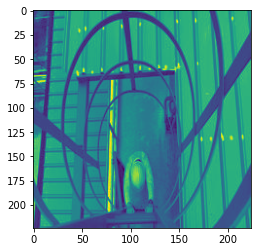

In [59]:
plt.imshow(image[0])

In [34]:
f1 = os.getcwd() + '\\data\\4'
f2 = os.getcwd() + '\\annotation\\4'
ff1 = os.getcwd() + '\\data\\5'
ff2 = os.getcwd() + '\\annotation\\5'
s1 = os.getcwd() + '\\data\\6'
s2 = os.getcwd() + '\\annotation\\6'
hand1 = os.getcwd() + '\\data\\hands'
hand2 = os.getcwd() + '\\annotation\\hands'
human1 = os.getcwd() + '\\data\\humanhands'
human2 = os.getcwd() + '\\annotation\\humanhands'
ladder1 = os.getcwd() + '\\data\\ladder'
ladder2 = os.getcwd() + '\\annotation\\ladder'
wood1 = os.getcwd() + '\\data\\ladderwooden'
wood2 = os.getcwd() + '\\annotation\\ladderwooden'
shoe1 = os.getcwd() + '\\data\\shoes'
shoe2 = os.getcwd() + '\\annotation\\shoes'
trainer1 = os.getcwd() + '\\data\\trainershoes'
trainer2 = os.getcwd() + '\\annotation\\trainershoes'

In [41]:
set1 = [hand1,human1,ladder1,wood1,shoe1,trainer1]
set2 = [hand2,human2,ladder2,wood2,shoe2,trainer2]

In [43]:
for i in range(len(set1)):
    for g in range(len(set2)):
        if i == g:
            for f, f1 in enumerate(os.listdir(set1[i])):
                for b, b1 in enumerate(os.listdir(set2[g])):
                    if f == b:
                        if f1.split('.')[0] != b1.split('.')[0]:
                            print(f1,b1)

In [44]:
# import os 
# os.getcwd()
# collection = [hands,human,ladder,ladderwooden,shoes,trainershoes]
# for d in collection:
#     for i, filename in enumerate(os.listdir(d)):
#         os.rename(d + '\\' + filename, d + '\\' + d.split('\\')[-1] + str(i) + ".jpg")

In [101]:
cd ..

C:\Users\Chun Cheong So\Desktop\Tutoring\tests


In [102]:
pwd

'C:\\Users\\Chun Cheong So\\Desktop\\Tutoring\\tests'

In [113]:
data = Path('data')

In [122]:
imags = []

In [123]:
for i in data.glob('*.jpg'):
    img = cv2.imdecode(np.fromfile(i, dtype=np.uint8), cv2.cv2.IMREAD_COLOR)
    img = cv2.resize(img,(224,224))
    img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
    imags.append(img)
    imageio.imwrite(i, img)

In [117]:
len(imags)

552

In [118]:
imags[0].shape

(224, 224, 3)